installing libraries

In [ ]:
!pip install yfinance
!pip install keras
!pip install matplotlib
!pip install scikit-learn

importing the necessary packages

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

Download the dataset from  yfinance


In [ ]:
data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')
data = data[['Close']]

Check your data

In [ ]:
data.head()

In [ ]:
data.describe()

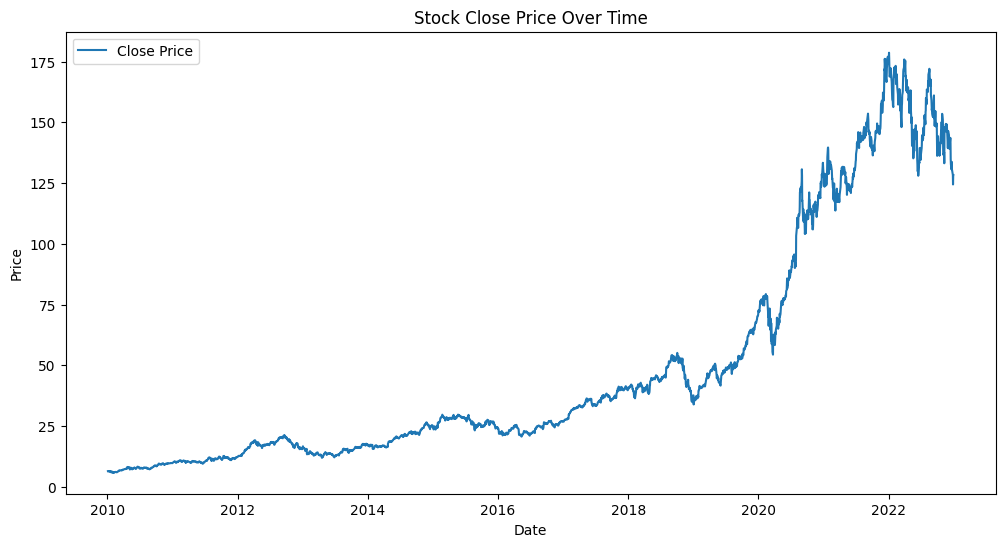

In [26]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

preprocess the dataset using MinMaxScaler from sklearn.preprocessing


In [19]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

train_size = int(len(scaled_data)*0.8)     #train dataset is 80%
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]   #test dataset is 20% remaining plus last 60 data

def create_sequence(dataset,seq_length) :
   x , y = [ ], [ ]
   for i in range(seq_length, len(dataset)) :
      x.append(dataset[i-seq_length:i,0])
      y.append(dataset[i,0])
   return np.array(x), np.array(y)


x_train , y_train = create_sequence(train_data,60)
x_test, y_test = create_sequence(test_data,60)

x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],1))

In [ ]:
print(scaled_data[:5])

Now we train our model

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences = True , input_shape = (60,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss ='mean_squared_error')
model.fit(x_train,y_train,epochs = 10,batch_size = 32)

we compared real and predicted values using matplotlib

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
print("Prediction: \n",predictions[:5])
print("Actual: \n",actual[:5])

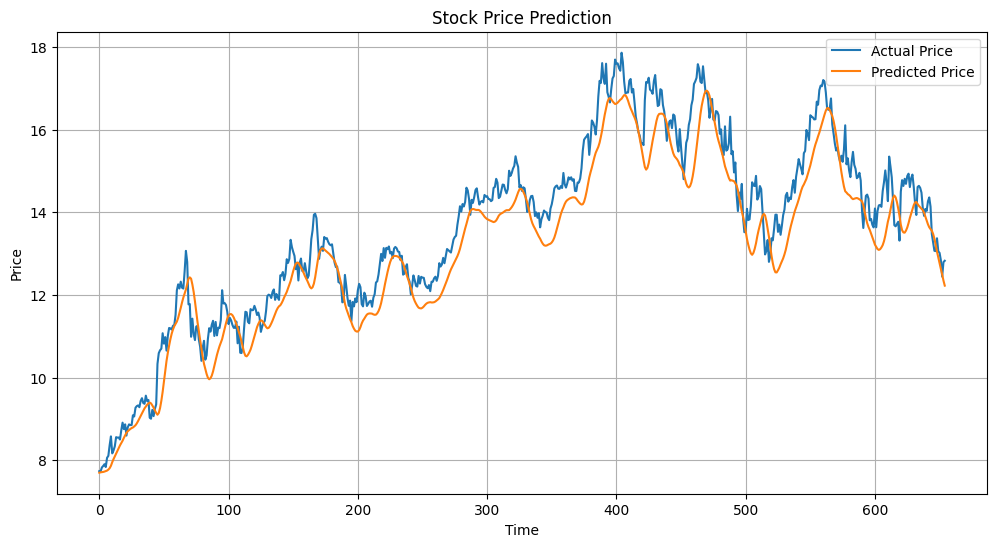

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
#today price

print("Today price is ",predictions[-1:])

Today price is  [[12.224683]]


now we predict tomorrow stock price using last 60 days

In [ ]:
last_60_day = data[-60:]

scaled_last_60_day = scaler.transform(last_60_day)

input_for_pred = scaled_last_60_day.reshape((1,scaled_last_60_day.shape[0],1))

pred_scaled_price = model.predict(input_for_pred)

pred_price = scaler.inverse_transform(pred_scaled_price)

print("Tomorrow's Stock Price Prediction: ",pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Tomorrow's Stock Price Prediction:  [[12.129642]]
